# Módulo 12: Modelos  de Regressão
# Exercício 2: Transformações em X e Y



### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [34]:
# carregando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import warnings


In [35]:
# Desativar avisos de FutureWarning específicos

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [36]:
# carregando arquivo, construindo DataFrame e calculando colunas

tips = sns.load_dataset("tips")                                      # base de dados do "seaborn"
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])   # porcentagem da gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']                  # valor líquido da gorjeta

In [37]:
# informações sobre os dados

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [38]:
# modelo de regressão é a linha de tendência nos gráficos
# modelo de regressão simples para as variáveis "tip_pct" (resposta) e "net_bill" (explicativa)

reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

# Resumo da regressão

# Dep. Variable = variável resposta = "tip_pct"

# R-squared = R-quadrado = 0.091 = indica que cerca de 0.09% da 
### variabilidade na gorjeta pode ser explicada pelo valor líquido da conta "net_bill".

# Intercept x coef = alpha = 0.30 = quando o valor líquido da conta (net_bill) 
### é zero, a gorjeta prevista é de aproximadamente 0.30.

# net_bill x coef = beta = -0.0061 =  em média, para um aumento unitário no valor 
### líquido da conta, podemos esperar um descréscimo de -0.0061 unidades na gorjeta.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.52e-06
Time:                        10:45:49   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.536278737869487)

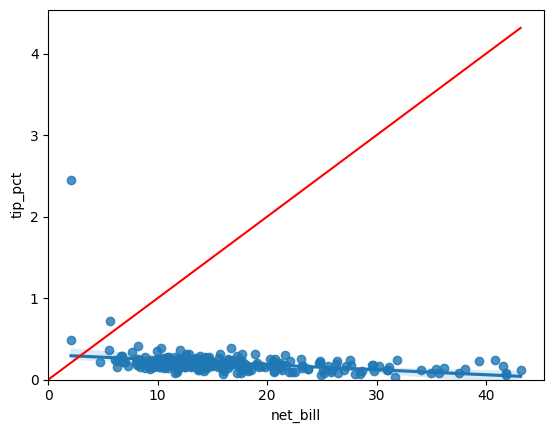

In [39]:
# gráfico de dispersão "tip_pct" por "net_bill"

sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)


# Resumo do gráfico

# linha vermelha = linha padrão dos 10%
# linha azul = regressão que representa a relação entre a gorjeta e o valor líquido da conta.

### 2. Ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [40]:
# ajuste do modelo de "tip_pct" em função de "log(net_bill)"

tips['log_net_bill'] = np.log(tips['net_bill'] + 0.1)        # Adicionando 0.1 para evitar problemas com valores zero

reg = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()
print(reg.summary())
tips['residuos'] = reg.resid



                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.35e-13
Time:                        10:45:52   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6204      0.055     11.342   

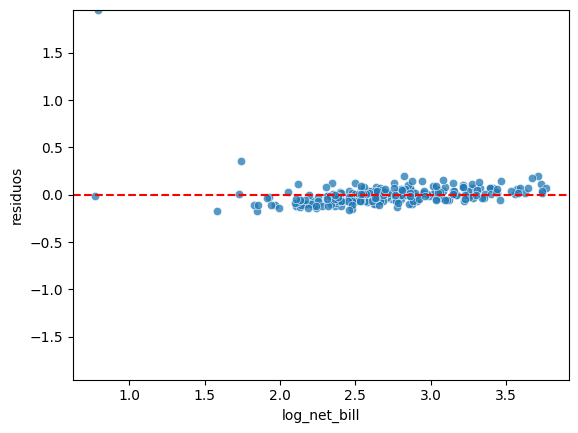

In [41]:
# gráfico de dispersão dos resíduos - "tip_pct" em função de "log(net_bill)"

sns.scatterplot(x='log_net_bill', y='residuos', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

# Ajustando os limites do eixo y para centralizar em zero
ylim_max = max(abs(tips['residuos'].max()), abs(tips['residuos'].min()))
plt.ylim(-ylim_max, ylim_max)

plt.show()

###  3. Ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [42]:
# ajuste do modelo para polinômio do 2º grau

tips['pow_net_bill'] = np.power(tips['net_bill'], 2)   
reg = smf.ols('tip_pct ~ pow_net_bill', data=tips).fit()
print(reg.summary())
tips['residuos'] = reg.resid
 

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           0.000297
Time:                        10:45:56   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2388      0.014     16.725   

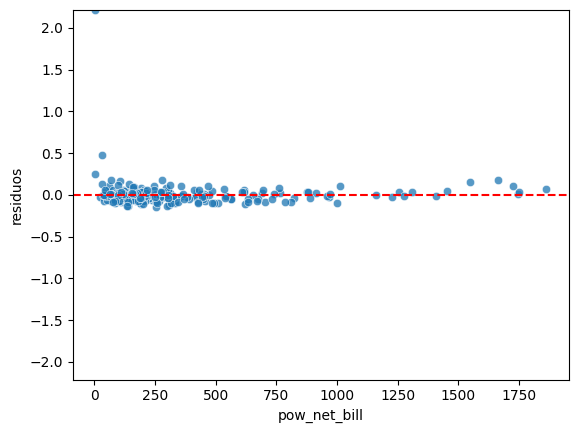

In [43]:
# gráfico de dispersão dos resíduos - função de 2º grau

sns.scatterplot(x='pow_net_bill', y='residuos', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

# Ajustando os limites do eixo y para centralizar em zero
ylim_max = max(abs(tips['residuos'].max()), abs(tips['residuos'].min()))
plt.ylim(-ylim_max, ylim_max)

plt.show()

###  4. Ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [44]:
# ajustando o modelo de "log(tip_pct)" em função de "net_bill"

reg = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           8.27e-16
Time:                        10:46:00   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

In [45]:
# Calculando o R-quadrado de "log(tip_pct)" em função de "net_bill"

r_squared = reg.rsquared

print('O R-quadrado de log(tip_pct) em função de net_bill é:')
print(r_squared)

O R-quadrado de log(tip_pct) em função de net_bill é:
0.23534487140864313


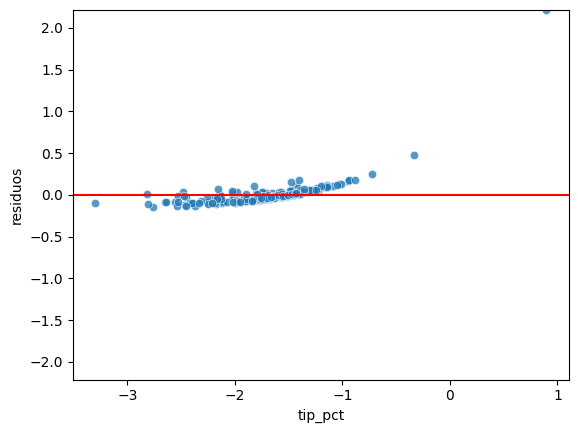

In [48]:
# gráfico de dispersão dos resíduos -  "log(tip_pct)" em função de "net_bill"

sns.scatterplot(x=np.log(tips['tip_pct']), y='residuos', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='-')

# Ajustando os limites do eixo y para centralizar em zero
ylim_max = max(abs(tips['residuos'].max()), abs(tips['residuos'].min()))
plt.ylim(-ylim_max, ylim_max)

plt.show()

###  5. Ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [49]:
# ajustando o modelo de "log(tip_pct)" em função de "log(net_bill)"

tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

reg = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           5.20e-20
Time:                        10:46:59   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

###  6. qual modelo resultou no melhor ajuste?

- **Resposta:**
- O modelo que resultou melhor ajuste se baseando no R-quadrado foi **log(tip_pct)** em função do **log(net_bill)**. O R-quadrado foi o MAIOR neste caso com o valor de **2.29**